In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://github.com/edyoda/data-science-complete-tutorial/raw/master/Data/Shopping_Revenue.csv"
data = pd.read_csv(url)
print(data.head())
print(data.info())

   Id  Open Date        City  City Group Type  P1   P2   P3   P4  P5  ...  \
0   0  7/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
1   1  2/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2   2   3/9/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2  ...   
3   3   2/2/2012       Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4   4   5/9/2009   Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   

   P29  P30  P31  P32  P33  P34  P35  P36  P37  revenue  
0  3.0    5    3    4    5    5    4    3    4  5653753  
1  3.0    0    0    0    0    0    0    0    0  6923131  
2  3.0    0    0    0    0    0    0    0    0  2055379  
3  7.5   25   12   10    6   18   12   12    6  2675511  
4  3.0    5    1    3    2    3    4    3    3  4316715  

[5 rows x 43 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      ---

In [2]:
data['P6'].fillna(data['P6'].mean(), inplace=True)
data['P7'].fillna(data['P7'].mean(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    float64
 11  P7          137 non-null    float64
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [3]:
data = data.drop(['Id', 'Open Date', 'City'], axis = 1)
data.head()

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,Big Cities,IL,4,5.0,4.0,4.0,2,2.0,5.0,4,...,3.0,5,3,4,5,5,4,3,4,5653753
1,Big Cities,FC,4,5.0,4.0,4.0,1,2.0,5.0,5,...,3.0,0,0,0,0,0,0,0,0,6923131
2,Other,IL,2,4.0,2.0,5.0,2,3.0,5.0,5,...,3.0,0,0,0,0,0,0,0,0,2055379
3,Other,IL,6,4.5,6.0,6.0,4,4.0,10.0,8,...,7.5,25,12,10,6,18,12,12,6,2675511
4,Other,IL,3,4.0,3.0,4.0,2,2.0,5.0,5,...,3.0,5,1,3,2,3,4,3,3,4316715


In [4]:
data = pd.get_dummies(data, columns = ['City Group', 'Type'], drop_first=True)
data.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P32,P33,P34,P35,P36,P37,revenue,City Group_Other,Type_FC,Type_IL
0,4,5.0,4.0,4.0,2,2.0,5.0,4,5,5,...,4,5,5,4,3,4,5653753,0,0,1
1,4,5.0,4.0,4.0,1,2.0,5.0,5,5,5,...,0,0,0,0,0,0,6923131,0,1,0
2,2,4.0,2.0,5.0,2,3.0,5.0,5,5,5,...,0,0,0,0,0,0,2055379,1,0,1
3,6,4.5,6.0,6.0,4,4.0,10.0,8,10,10,...,10,6,18,12,12,6,2675511,1,0,1
4,3,4.0,3.0,4.0,2,2.0,5.0,5,5,5,...,3,2,3,4,3,3,4316715,1,0,1


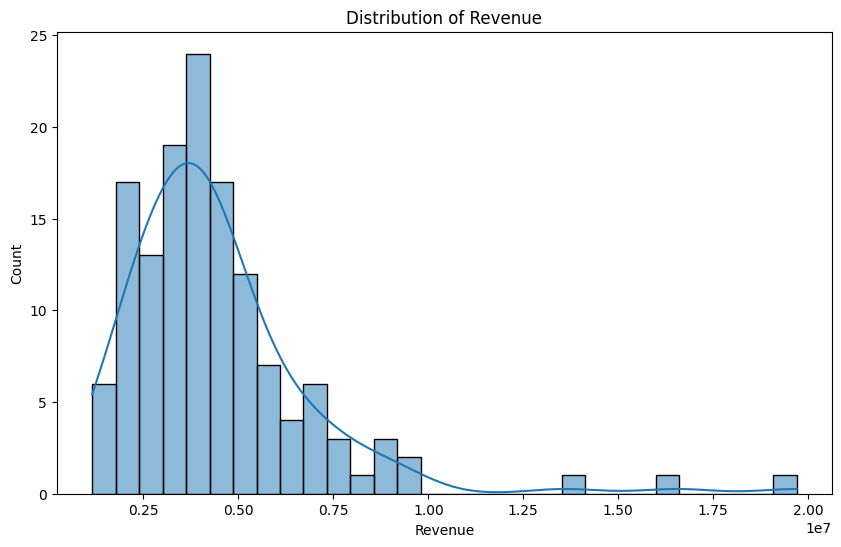

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data['revenue'], bins=30, kde=True)
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.title('Distribution of Revenue')
plt.show()

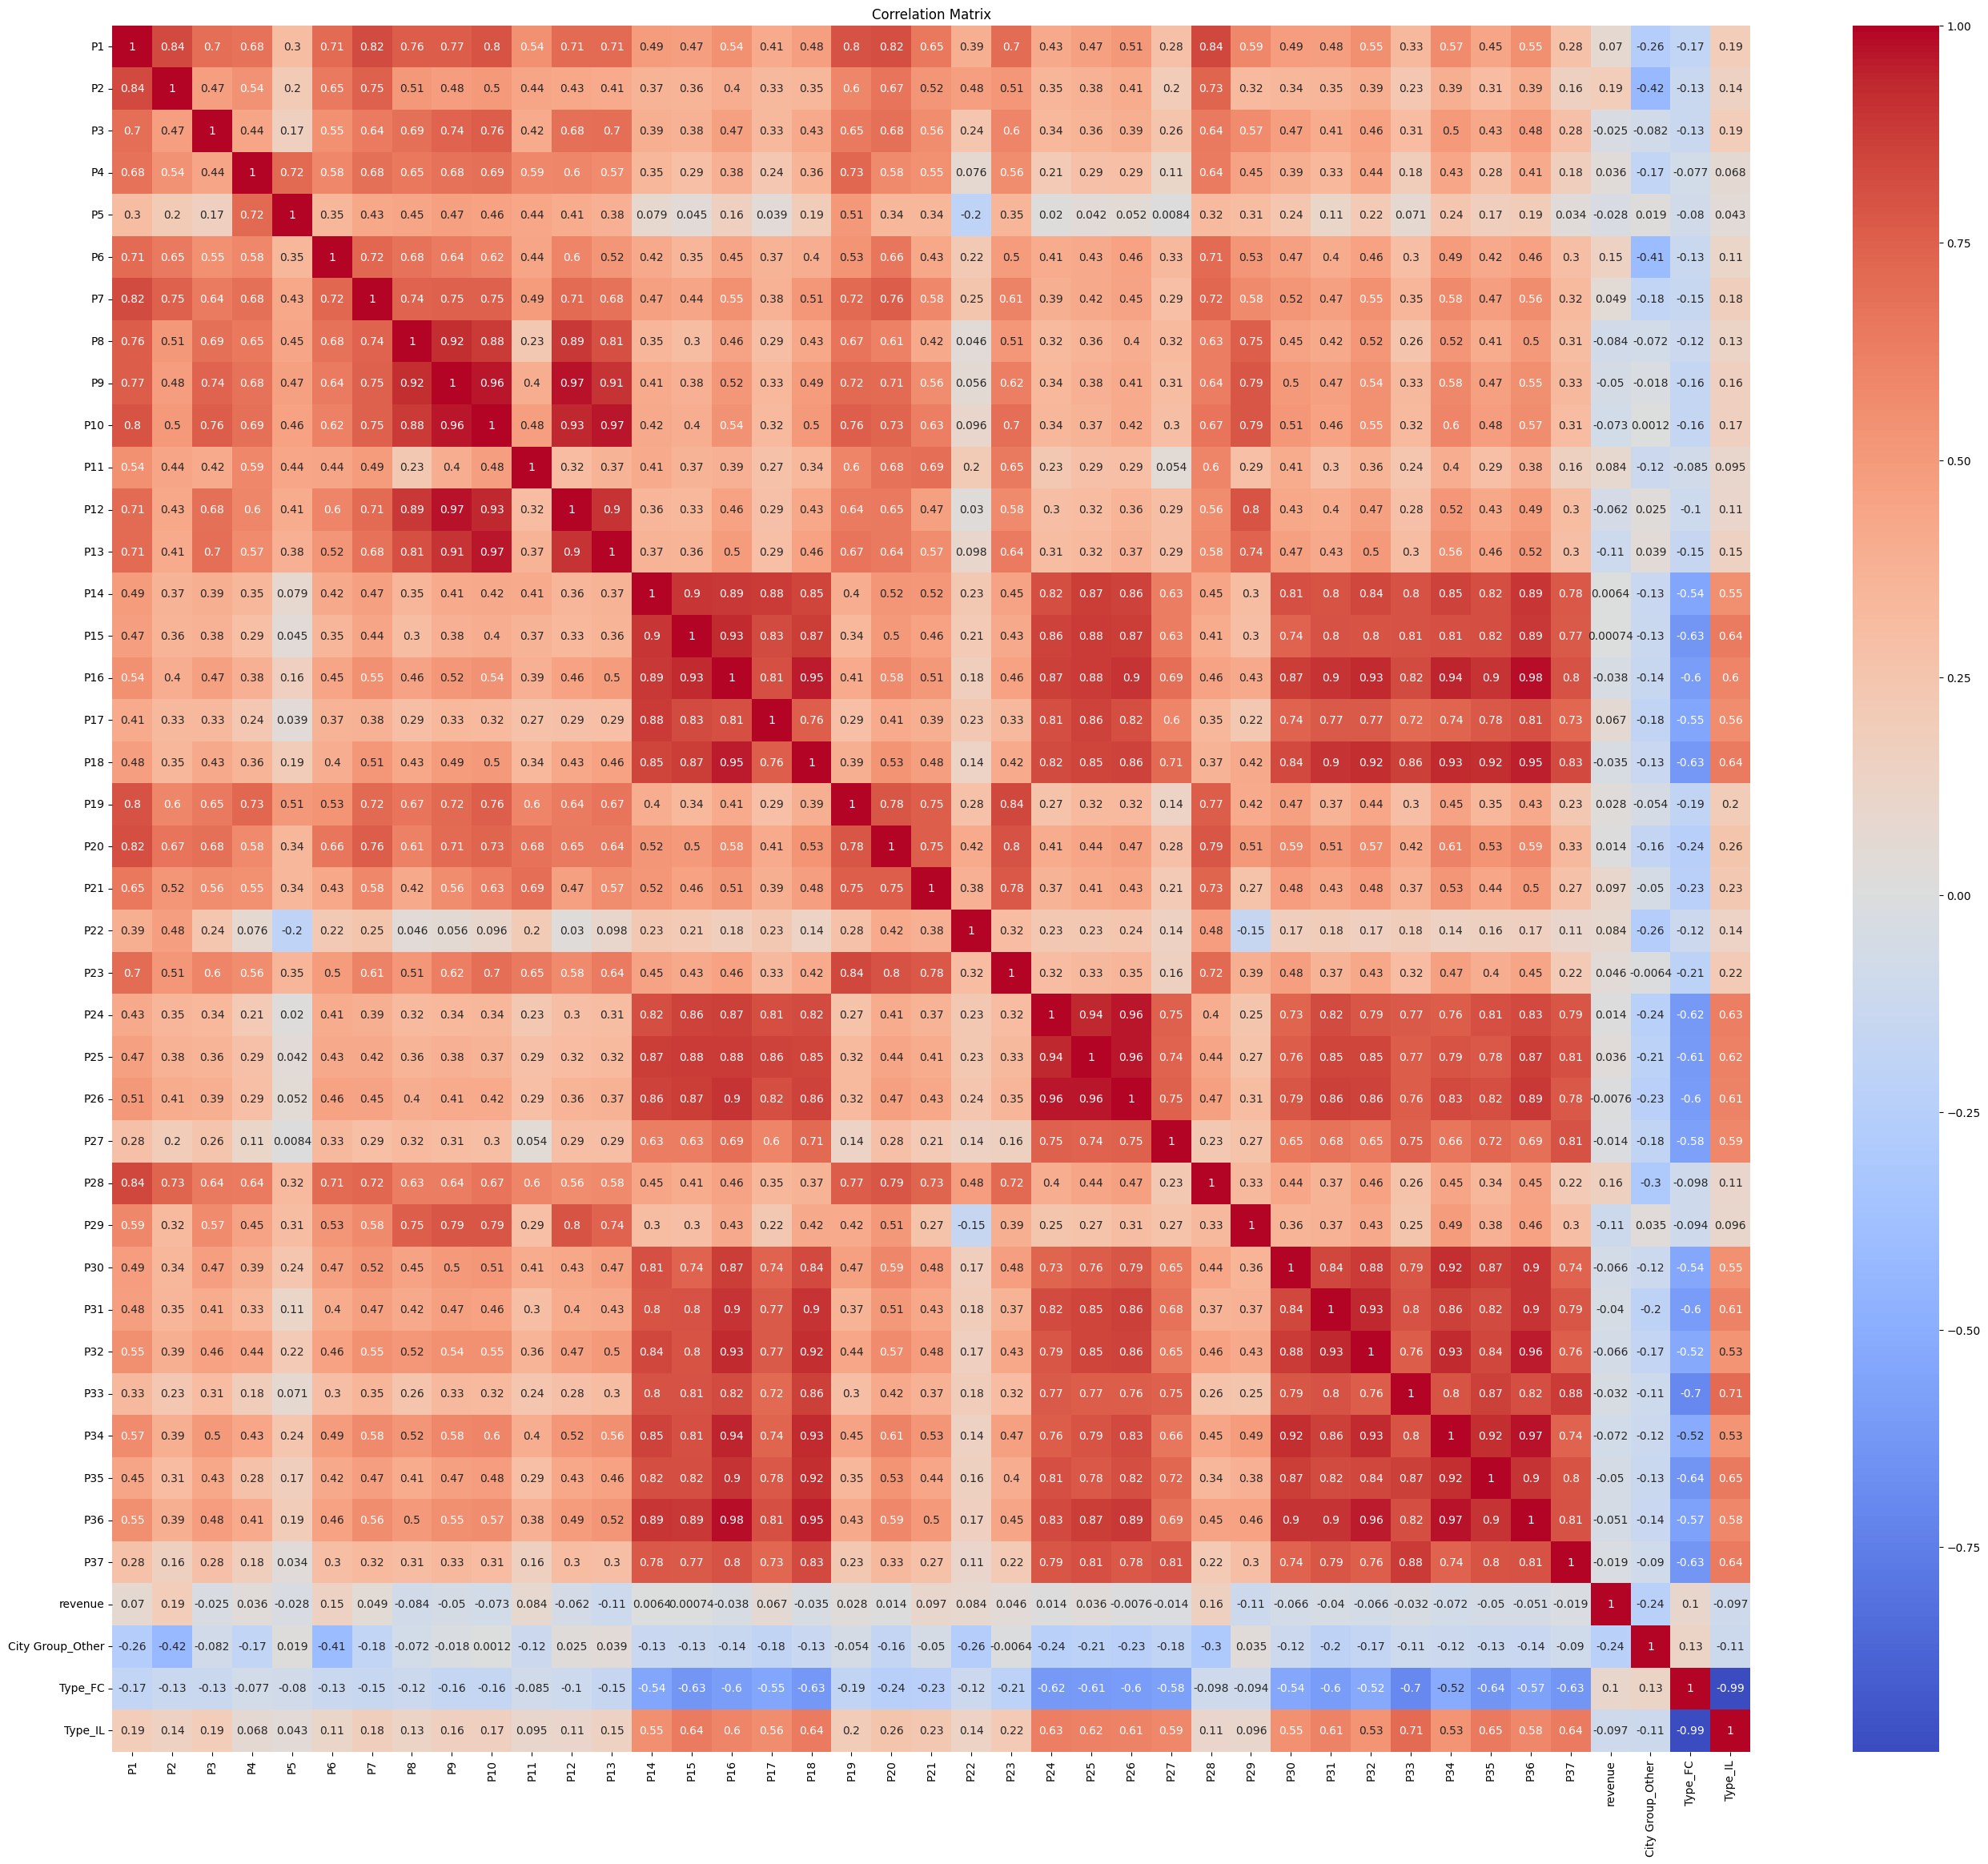

In [6]:
correlation_matrix = data.corr()
plt.figure(figsize=(33, 28))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [7]:
data = data[['P2', 'P6', 'P13', 'P28', 'P29', 'City Group_Other', 'Type_FC', 'revenue']]
data.head()

,P2,P6,P13,P28,P29,City Group_Other,Type_FC,revenue
0,5.0,2.0,5.0,2.0,3.0,0,0,5653753
1,5.0,2.0,5.0,3.0,3.0,0,1,6923131
2,4.0,3.0,5.0,1.0,3.0,1,0,2055379
3,4.5,4.0,7.5,2.5,7.5,1,0,2675511
4,4.0,2.0,5.0,1.0,3.0,1,0,4316715


In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = data.drop('revenue', axis = 1)
y = data['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


Mean Absolute Error: 1744043.87832339
Mean Squared Error: 10327230756374.973
R-squared: 0.029249019352733052


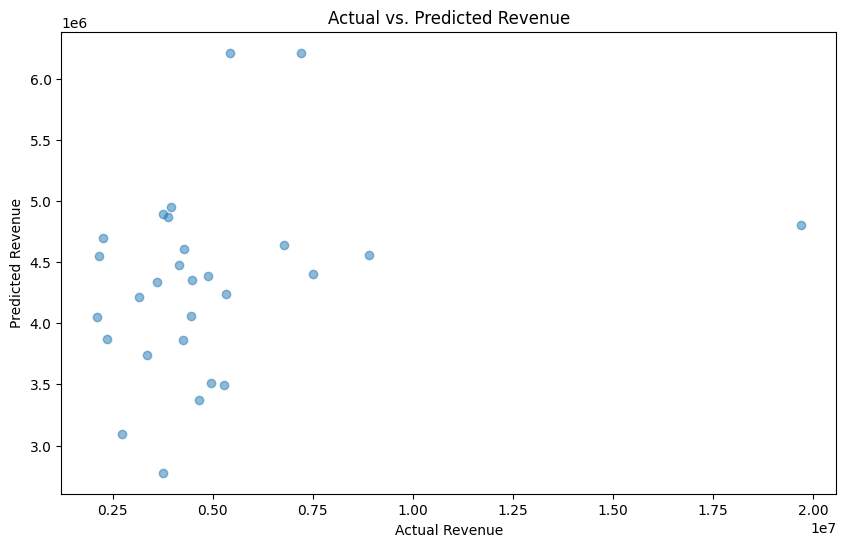

In [9]:
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs. Predicted Revenue")
plt.show()